In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#Statistics
# Statistics
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from scipy.interpolate import interp1d

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from dateutil.parser import parse 
import pickle

# READ CSV AND DESCRIPTION OF SERIES


In [2]:
#DIFFICULTY RIBBON
difficulty_ribbon = pd.read_csv("data/bitcoin-difficulty-ribbon.csv")

difficulty_ribbon["Difficulty Ribbon/t"] = difficulty_ribbon["Difficulty Ribbon/t"].str.rstrip("T00:00:00.000Z")
difficulty_ribbon["Difficulty Ribbon/t"] = pd.to_datetime(difficulty_ribbon["Difficulty Ribbon/t"])
difficulty_ribbon = difficulty_ribbon.sort_values(by='Difficulty Ribbon/t')
difficulty_ribbon = difficulty_ribbon.rename(columns={'Difficulty Ribbon/t': 'Timestamp'})
difficulty_ribbon.head()

,Timestamp,Difficulty Ribbon/o/ma128,Difficulty Ribbon/o/ma14,Difficulty Ribbon/o/ma200,Difficulty Ribbon/o/ma25,Difficulty Ribbon/o/ma40,Difficulty Ribbon/o/ma60,Difficulty Ribbon/o/ma9,Difficulty Ribbon/o/ma90
2,2009-07-03,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09
0,2009-07-28,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09
1,2009-07-29,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09
3,2009-07-31,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09
4,2009-08-01,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09,4.294967e+09


In [3]:
#Description
print("\nShape is:", difficulty_ribbon.shape)
print("\nSummary of the dataset:")
difficulty_ribbon.describe()
print("\nAre there null values?")
difficulty_ribbon.isna().sum()


Shape is: (4782, 9)

Summary of the dataset:

Are there null values?


Timestamp                    0
Difficulty Ribbon/o/ma128    0
Difficulty Ribbon/o/ma14     0
Difficulty Ribbon/o/ma200    0
Difficulty Ribbon/o/ma25     0
Difficulty Ribbon/o/ma40     0
Difficulty Ribbon/o/ma60     0
Difficulty Ribbon/o/ma9      0
Difficulty Ribbon/o/ma90     0
dtype: int64

# VISUALIZATION

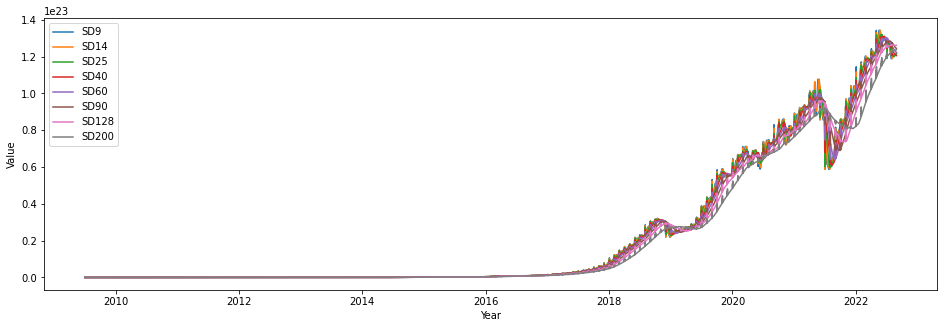

In [4]:
plt.figure(figsize=(16,5))
plt.plot(difficulty_ribbon["Timestamp"], difficulty_ribbon["Difficulty Ribbon/o/ma9"])
plt.plot(difficulty_ribbon["Timestamp"], difficulty_ribbon["Difficulty Ribbon/o/ma14"])
plt.plot(difficulty_ribbon["Timestamp"], difficulty_ribbon["Difficulty Ribbon/o/ma25"])
plt.plot(difficulty_ribbon["Timestamp"], difficulty_ribbon["Difficulty Ribbon/o/ma40"])
plt.plot(difficulty_ribbon["Timestamp"], difficulty_ribbon["Difficulty Ribbon/o/ma60"])
plt.plot(difficulty_ribbon["Timestamp"], difficulty_ribbon["Difficulty Ribbon/o/ma90"])
plt.plot(difficulty_ribbon["Timestamp"], difficulty_ribbon["Difficulty Ribbon/o/ma128"])
plt.plot(difficulty_ribbon["Timestamp"], difficulty_ribbon["Difficulty Ribbon/o/ma200"])
plt.gca().set(xlabel="Year", ylabel="Value")
#scommentare riga giù per visualizzare in scala log
#plt.yscale('log') 
plt.legend(['SD9', 'SD14', 'SD25', 'SD40', 'SD60', 'SD90', 'SD128', 'SD200'])
plt.show()


#ADD LEGEND

#ANCHE QUI, CAPIRE PERCHE' SI VEDANO QUEI "PICCHI" (credo si vedano perchè il range y è troppo alto)

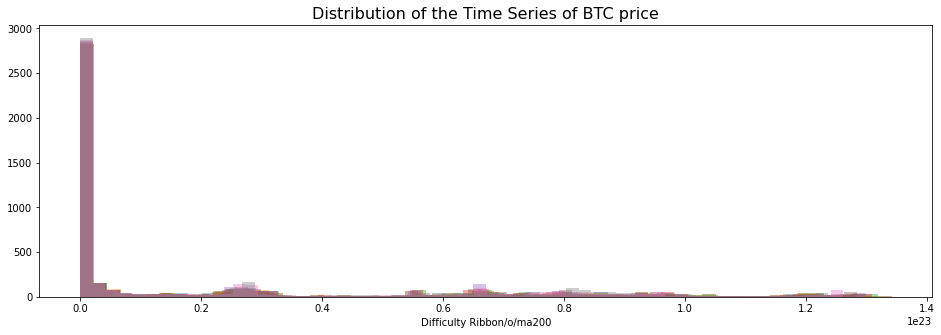

In [7]:
plt.figure(figsize=(16,5))
sns.distplot(difficulty_ribbon["Difficulty Ribbon/o/ma9"], kde = False, bins = 60)
sns.distplot(difficulty_ribbon["Difficulty Ribbon/o/ma14"], kde = False, bins = 60)
sns.distplot(difficulty_ribbon["Difficulty Ribbon/o/ma25"], kde = False, bins = 60)
sns.distplot(difficulty_ribbon["Difficulty Ribbon/o/ma40"], kde = False, bins = 60)
sns.distplot(difficulty_ribbon["Difficulty Ribbon/o/ma60"], kde = False, bins = 60)
sns.distplot(difficulty_ribbon["Difficulty Ribbon/o/ma90"], kde = False, bins = 60)
sns.distplot(difficulty_ribbon["Difficulty Ribbon/o/ma128"], kde = False, bins = 60)
sns.distplot(difficulty_ribbon["Difficulty Ribbon/o/ma200"], kde = False, bins = 60)
plt.title('Distribution of the Time Series of BTC price', fontsize=16)
plt.show()